# matplotlib 入門 (14) nitta@tsuda.ac.jp
# Chapter 14: Animation (compatible with Google Colab) (2) 


# OpenAI Gym Envs on Google Colab

In order to animate OpenAI Gym Envs on Google Colab, you need to use the virtual display <code>Xvfb</code> via <b>PyVirtualDisplay</b>.

In [ ]:
is_colab = 'google.colab' in str(get_ipython())   # for Google Colab

In [ ]:
if is_colab:
    !apt update -qq
    !apt install -qq xvfb
    !pip -q install pyvirtualdisplay

63 packages can be upgraded. Run 'apt list --upgradable' to see them.
xvfb is already the newest version (2:1.19.6-1ubuntu4.10).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 63 not upgraded.


## Animation by displaying images frame by fame

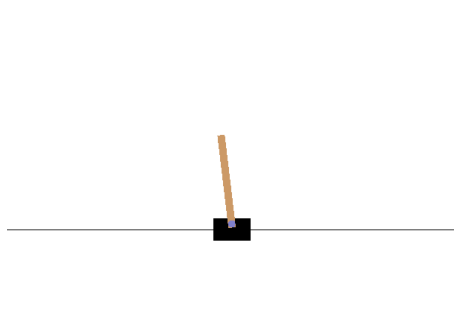

In [ ]:
%matplotlib inline
import gym
from IPython import display
import matplotlib.pyplot as plt

if is_colab:
    from pyvirtualdisplay import Display
    vdisplay = Display()
    vdisplay.start()

env = gym.make('CartPole-v1')

env.reset()

fig = plt.figure(figsize=(8,6))
plt.axis('off')
img = plt.imshow(env.render(mode='rgb_array'))
for _ in range(100):
    observation, reward, done, info = env.step(env.action_space.sample()) # needs action from DNN

    display.clear_output(wait=True)
    img.set_data(env.render(mode='rgb_array'))

    display.display(plt.gcf())

    if done:
        env.reset()
        
plt.close()

<video controls width="600">
    <source src="https://nw.tsuda.ac.jp/lec/python/matplotlib/tutorial/anim14a.mp4" type="video/mp4">
</video>

## FuncAnimation

In [ ]:
import gym
from IPython import display
import matplotlib.pyplot as plt
from matplotlib import animation

if is_colab:
    from pyvirtualdisplay import Display
    vdisplay = Display()
    vdisplay.start()

env = gym.make('CartPole-v1')
env.reset()

plt.figure(figsize=(8,6))
patch = plt.imshow(env.render(mode='rgb_array'))
plt.axis('off')

def animate(i):
    observation, reward, done, info = env.step(env.action_space.sample()) # needs action from DNN
    display.clear_output(wait=True)
    patch.set_data(env.render(mode='rgb_array'))
    if done:
        env.reset()
    return patch


anim = animation.FuncAnimation(plt.gcf(), animate, frames=100, interval=50, repeat=False)
display.display(display.HTML(anim.to_jshtml()))

plt.close()

<video controls width="600">
    <source src="https://nw.tsuda.ac.jp/lec/python/matplotlib/tutorial/anim14b.mp4" type="video/mp4">
</video>